In [30]:
# Author: Hussain Abbas, MSc
# © 2021 Stats AI LLC 
# All Rights Reserved

import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [31]:
df = pd.read_csv('C:/Users/deepl/Desktop/Anomaly_Detection Project/driver_behavior.csv')

df

,FAXEX,BCACE,DBBAB,AAXFE,BXCEC
0,-0.893210,-2.080530,1.581359,-0.739197,-0.115923
1,-0.279951,2.575102,0.329756,0.248520,0.324917
2,-3.898434,-0.024275,-1.728197,4.992603,2.395236
3,-3.120864,-3.031472,-0.021979,2.755907,1.216255
4,-1.049326,0.953137,-1.905779,-1.566512,2.589435
...,...,...,...,...,...
9995,-0.618424,-2.945030,2.429603,1.786126,1.497155
9996,-0.971600,1.545476,0.379079,-0.642436,0.262755
9997,0.045780,-2.214428,2.672059,3.002813,-0.052627
9998,-1.849218,-1.168485,-1.120131,2.010948,1.427708


Text(0.5, 1.0, 'Elbow curve')

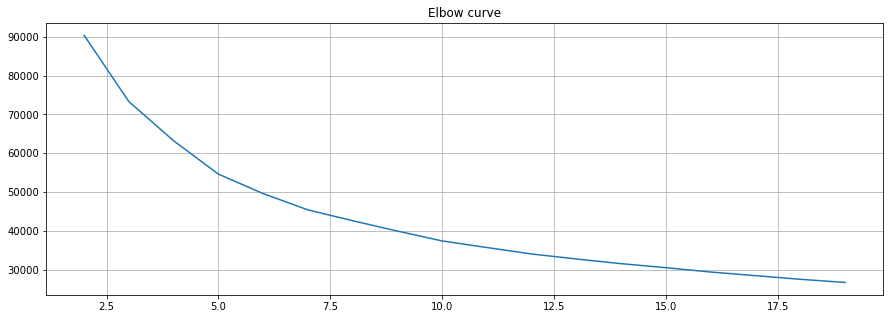

In [32]:
# We will use the Kmeans method for clustering since it is a good starting point for unsupervised learning. 
# Clustering is an iterative process: Generally we use some method to get a set of clusters
# We then take some action that depends upon the clusters, i.e., build models that use the cluster information
# We can refine our "targeting" via clusters by better modeling the data generating process
# Thus, if our clusters are not spherical, we could potentially refine our targeting with a method like DBSCAN

# The following loop enables us to compute the optimal number of clusters using the elbow method. 

distorsions = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

# From the elbow curve, it seems the optimal number of clusters is between 6 and 10. 
# Kmeans with 6 clusters is a widely known heuristic. 
# After 10 clusters, we seem to be getting dimishing returns, so we'll pick 10 
# to be the optimal number of clusters.

In [33]:
# create our new kmeans model with 10 clusters as identified using the elbow plot

kmeans = KMeans(n_clusters = 10)
kmeans.fit(df)

# add the cluster labels to the dataframe
df['cluster_labels'] = kmeans.labels_

# show the new dataframe
display(df)

# show the percentage of data corresponding to each cluster
df['cluster_labels'].value_counts() / len(df['cluster_labels'])

,FAXEX,BCACE,DBBAB,AAXFE,BXCEC,cluster_labels
0,-0.893210,-2.080530,1.581359,-0.739197,-0.115923,3
1,-0.279951,2.575102,0.329756,0.248520,0.324917,5
2,-3.898434,-0.024275,-1.728197,4.992603,2.395236,9
3,-3.120864,-3.031472,-0.021979,2.755907,1.216255,9
4,-1.049326,0.953137,-1.905779,-1.566512,2.589435,7
...,...,...,...,...,...,...
9995,-0.618424,-2.945030,2.429603,1.786126,1.497155,4
9996,-0.971600,1.545476,0.379079,-0.642436,0.262755,5
9997,0.045780,-2.214428,2.672059,3.002813,-0.052627,4
9998,-1.849218,-1.168485,-1.120131,2.010948,1.427708,9


7    0.1486
3    0.1217
9    0.1047
6    0.0993
1    0.0988
5    0.0930
0    0.0919
8    0.0827
2    0.0825
4    0.0768
Name: cluster_labels, dtype: float64